<a href="https://colab.research.google.com/github/holps-7/PDC-weekly/blob/master/PDC_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#Ramesh Sachan 18BCE2030
code = """
#include <stdio.h>
#include <omp.h>

int main(){ 
    int partial_Sum, total_Sum;
    double start, end;
    start = omp_get_wtime();
    #pragma omp parallel private(partial_Sum) shared(total_Sum)
    {
        partial_Sum = 0;
        total_Sum = 0;
        #pragma omp for
        {
            for(int i = 1; i <= 1000; i++){
                partial_Sum += i;
            }
        }

        //Create thread safe region.
        #pragma omp critical
        {
                //add each threads partial sum to the total sum
                total_Sum += partial_Sum;
        }
    }
    end = omp_get_wtime();
    printf("Total Sum: %d", total_Sum);
    printf(" ");
    printf("Time taken %f", end - start);
}
"""

In [72]:
text_file = open("code.c", "w")
text_file.write(code)
text_file.close()

In [78]:
%env OMP_NUM_THREADS=2
!gcc -o hello -fopenmp code.c
!./hello

env: OMP_NUM_THREADS=2
code.c: In function ‘main’:
code.c:14:9: error: for statement expected before ‘{’ token
         {
         ^
Total Sum: 1001000 Time taken 0.000103

In [73]:
%env OMP_NUM_THREADS=3
!gcc -o hello -fopenmp code.c
!./hello

env: OMP_NUM_THREADS=3
code.c: In function ‘main’:
code.c:14:9: error: for statement expected before ‘{’ token
         {
         ^
Total Sum: 500500 Time taken 0.000224

In [74]:
%env OMP_NUM_THREADS=4
!gcc -o hello -fopenmp code.c
!./hello

env: OMP_NUM_THREADS=4
code.c: In function ‘main’:
code.c:14:9: error: for statement expected before ‘{’ token
         {
         ^
Total Sum: 500500 Time taken 0.000227

In [75]:
%env OMP_NUM_THREADS=5
!gcc -o hello -fopenmp code.c
!./hello

env: OMP_NUM_THREADS=5
code.c: In function ‘main’:
code.c:14:9: error: for statement expected before ‘{’ token
         {
         ^
Total Sum: 500500 Time taken 0.000261

In [76]:
%env OMP_NUM_THREADS=8
!gcc -o hello -fopenmp code.c
!./hello

env: OMP_NUM_THREADS=8
code.c: In function ‘main’:
code.c:14:9: error: for statement expected before ‘{’ token
         {
         ^
Total Sum: 500500 Time taken 0.000391

In [77]:
%env OMP_NUM_THREADS=500
!gcc -o hello -fopenmp code.c
!./hello

env: OMP_NUM_THREADS=500
code.c: In function ‘main’:
code.c:14:9: error: for statement expected before ‘{’ token
         {
         ^
Total Sum: 500500 Time taken 0.019226

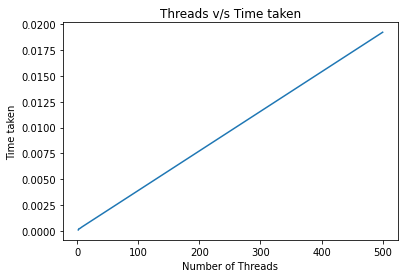

In [79]:
import matplotlib.pyplot as plt 
  
x = [2,3,4,5,8,500] 
y = [0.000103,0.000224,0.000227,0.000261,0.000391,0.019226] 
  
plt.plot(x, y) 
  
plt.xlabel('Number of Threads') 
# naming the y axis 
plt.ylabel('Time taken') 
  
# giving a title to my graph 
plt.title('Threads v/s Time taken') 
  
# function to show the plot 
plt.show()